In [26]:
import numpy as np
import math

from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [47]:
N_data = np.array([113_265_216,
113_265_216,
113_265_216,
169_906_752,
169_906_752,
226_548_288,
226_548_288,
251_689_920,
251_689_920,
330_348_480,
330_348_480,
409_007_040,
409_007_040])

D_data = np.array([12771328,
19156992,
25542656,
12771328,
19156992,
12771328,
19156992,
12771328,
19156992,
12771328,
19156992,
12771328,
19156992])

L_data = np.log([1.9886,
0.43355,
0.086,
2.0748,
0.3522,
2.10401,
0.28972,
2.07423,
0.49875,
2.099,
0.3935,
2.32526,
0.46286])

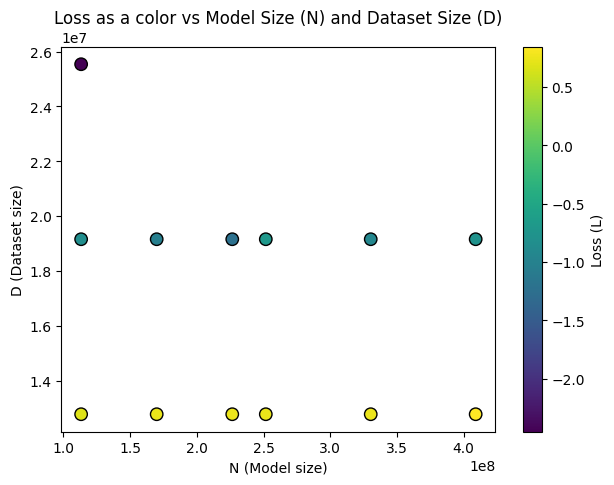

In [48]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(7, 5))

# Make a 2D scatter plot where color = L_data
scatter_plot = ax.scatter(
    x=N_data,
    y=D_data,
    c=L_data,          # Color encode the loss
    cmap='viridis',    # Choose any matplotlib colormap
    s=80,              # Marker size
    edgecolors='black' # Optional styling
)

# Add a colorbar indicating the range of L values
cbar = plt.colorbar(scatter_plot, ax=ax)
cbar.set_label("Loss (L)")

# Label your axes
ax.set_xlabel("N (Model size)")
ax.set_ylabel("D (Dataset size)")
plt.title("Loss as a color vs Model Size (N) and Dataset Size (D)")

plt.show()

In [49]:
def scaling_law(data, A, alpha, B, beta):
    N, D = data
    return 0.001 + A / (N**alpha) + B / (D**beta)

In [50]:
def scaling_law_log(data, A, alpha, B, beta):
    N, D = data
    return -6.9 + A - (alpha * np.log(N)) + B - (beta * np.log(D))

In [51]:
p0 = [100, 0.5, 100, 0.5]

# Fit the curve
popt, pcov = curve_fit(scaling_law_log, (N_data, D_data), L_data, p0=p0)
A_fit, alpha_fit, B_fit, beta_fit = popt

In [52]:
print("Fitted parameters:")
print("  A      =", A_fit)
print("  alpha  =", alpha_fit)
print("  B      =", A_fit)
print("  beta  =", beta_fit)

Fitted parameters:
  A      = -10002.80276438735
  alpha  = -0.14005345784537948
  B      = -10002.80276438735
  beta  = 4.267700122793969
